In [810]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from datetime import timedelta
# import re
# Load dataset
df = pd.read_csv("test(in).csv") 
df.head()

,Subject,body,date,from
0,EnronOptions Update!,EnronOptions Announcement\n\n\nWe have updated...,5/10/2010,sally.beck@enron.com
1,(No Subject),"Marc,\n\nUnfortunately, today is not going to ...",7/29/2010,eric.bass@enron.com
2,Phone Screen Interview - Shannon L. Burnham,"When: Wednesday, June 06, 2001 10:00 AM-11:00 ...",7/25/2011,sally.beck@enron.com
3,RE: My new work email,we were thinking papasitos (we can meet somewh...,3/25/2010,johnny.palmer@enron.com
4,Bet,Since you never gave me the $20 for the last t...,5/21/2011,lydia.delgado@enron.com


In [812]:
#task 1
!pip install textblob
from textblob import TextBlob
# # Function to classify sentiment based on polarity score
def sentiment_analyzer(text):
    sentiment = TextBlob(text)
    score = sentiment.sentiment.polarity
    #classification of score
    if score > 0:
        return 'Positive'
    elif score < 0:
        return 'Negative'
    else:
        return 'Neutral'
# Analyze sentiment for each message
sentiment_labels = []
for text in df['body']:
    label = sentiment_analyzer(text)
    sentiment_labels.append(label)
df['Sentiment'] = sentiment_labels
#df['Sentiment'] = df['body'].apply(sentiment)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2191 entries, 0 to 2190
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Subject    2191 non-null   object
 1   body       2191 non-null   object
 2   date       2191 non-null   object
 3   from       2191 non-null   object
 4   Sentiment  2191 non-null   object
dtypes: object(5)
memory usage: 85.7+ KB

Missing Values:
 Subject      0
body         0
date         0
from         0
Sentiment    0
dtype: int64

Sentiment Label Distribution:
 Sentiment
Positive    1218
Neutral      703
Negative     270
Name: count, dtype: int64


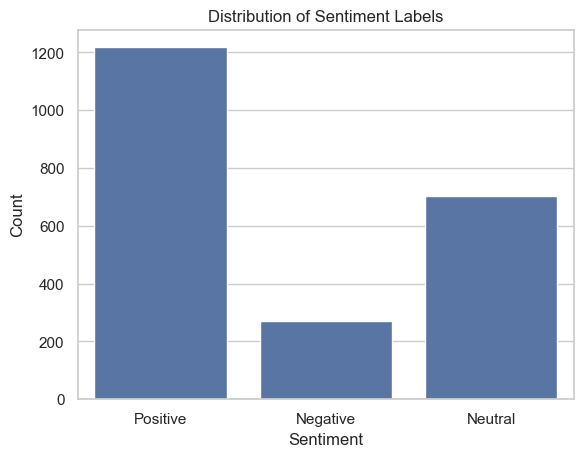

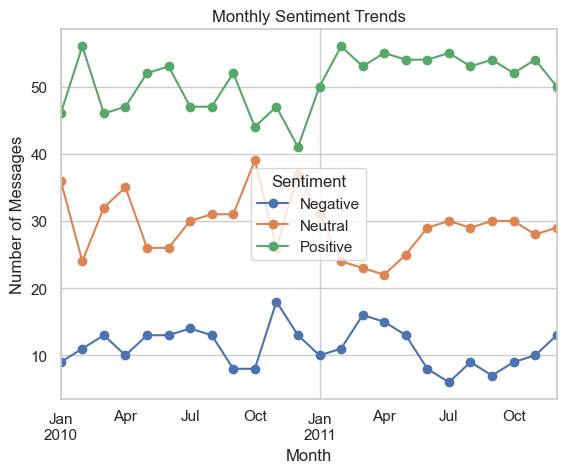

C:\Users\mahit\AppData\Local\Temp\ipykernel_35684\4158264525.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_employees.index, x=top_employees.values, palette="coolwarm")


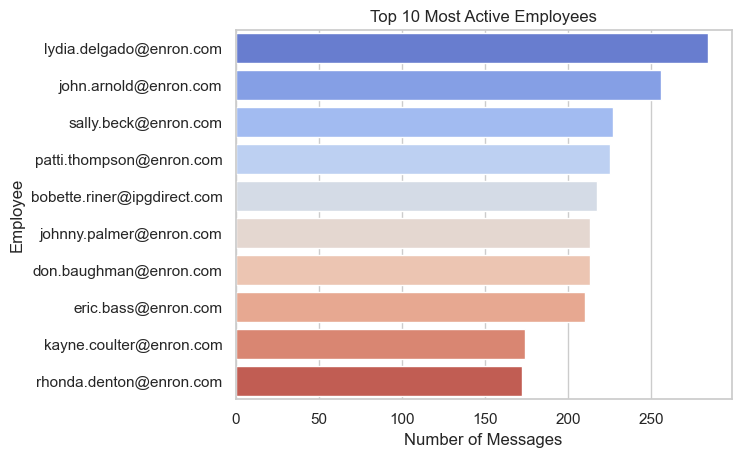

In [813]:
#task 2
# check data structure and input types
df.info()
# checks for missing values
print("\nMissing Values:\n", df.isnull().sum())

df.head()
# Count how many messages fall into each sentiment category
sentiment_counts = df['Sentiment'].value_counts()
print("\nSentiment Label Distribution:\n", sentiment_counts)

sns.countplot(data=df, x='Sentiment')
plt.title("Distribution of Sentiment Labels")
plt.ylabel("Count")
plt.xlabel("Sentiment")
plt.show()


#Convert 'date' to datetime and extract month
df['date'] = pd.to_datetime(df['date'])
df['Month'] = df['date'].dt.to_period('M')
# Group by month and sentiment, count messages
monthly_trends = df.groupby(['Month', 'Sentiment']).size().unstack().fillna(0)
#plots
monthly_trends.plot(kind='line',marker='o')
plt.title("Monthly Sentiment Trends")
plt.ylabel("Number of Messages")
plt.xlabel("Month")
plt.grid(True)
plt.show()

top_employees = df['from'].value_counts().head(10)
sns.barplot(y=top_employees.index, x=top_employees.values, palette="coolwarm")
plt.title("Top 10 Most Active Employees")
plt.xlabel("Number of Messages")
plt.ylabel("Employee")
plt.show()



In [814]:
#task 3
# Define numerical scores for each sentiment label
score_map = {'Positive': 1,'Neutral': 0,'Negative': -1}
# Map sentiment labels to scores and store in a new column
df['Score'] = df['Sentiment'].map(score_map)
# Group by employee and month, then sum sentiment scores for each group
monthly_scores = df.groupby(['from', 'Month']).agg(MonthlyScore=('Score', 'sum'))

monthly_scores




MonthlyScore
from                        Month                
bobette.riner@ipgdirect.com 2010-01             2
                            2010-02             8
                            2010-03             4
                            2010-04             4
                            2010-05             2
                            2010-06             0
                            2010-07             8
                            2010-08             1
                            2010-09             7
                            2010-10             3
                            2010-11             3
                            2010-12             2
                            2011-01             9
                            2011-02             1
                            2011-03             7
                            2011-04             8
                            2011-05             1
                            2011-06             5
                            2011-07             3
                            2011-08             1
                            2011-09             4
                            2011-10             0
                            2011-11             8
                            2011-12             0
don.baughman@enron.com      2010-01             5
                            2010-02             5
                            2010-03             1
                            2010-04             8
                            2010-05             7
                            2010-06            11
                            2010-07             3
                            2010-08             2
                            2010-09             2
                            2010-10             1
                            2010-11             3
                            2010-12             6
                            2011-01             4
                            2011-02             2
                            2011-03             1
                            2011-04             2
                            2011-05             6
                            2011-06             0
                            2011-07             2
                            2011-08             7
                            2011-09             5
                            2011-10             6
                            2011-11             2
                            2011-12             4
eric.bass@enron.com         2010-01             5
                            2010-02             4
                            2010-03             0
                            2010-04             0
                            2010-05             5
                            2010-06             0
                            2010-07             6
                            2010-08             0
                            2010-09             3
                            2010-10             6
                            2010-11             4
                            2010-12             2
                            2011-01             6
                            2011-02             1
                            2011-03             4
                            2011-04             6
                            2011-05             6
                            2011-06            10
                            2011-07             3
                            2011-08             4
                            2011-09             8
                            2011-10             3
                            2011-11             1
                            2011-12             4
john.arnold@enron.com       2010-01             3
                            2010-02            10
                            2010-03             5
                            2010-04             5
                            2010-05             1
                            2010-06             3
                            2010-07  

                            from    Month  MonthlyScore
120      kayne.coulter@enron.com  2010-01             9
24        don.baughman@enron.com  2010-01             5
48           eric.bass@enron.com  2010-01             5
73         john.arnold@enron.com  2010-02            10
1    bobette.riner@ipgdirect.com  2010-02             8
97       johnny.palmer@enron.com  2010-02             7
218         sally.beck@enron.com  2010-03             8
146      lydia.delgado@enron.com  2010-03             6
74         john.arnold@enron.com  2010-03             5
27        don.baughman@enron.com  2010-04             8
123      kayne.coulter@enron.com  2010-04             6
75         john.arnold@enron.com  2010-04             5
28        don.baughman@enron.com  2010-05             7
172     patti.thompson@enron.com  2010-05             6
220         sally.beck@enron.com  2010-05             6
29        don.baughman@enron.com  2010-06            11
101      johnny.palmer@enron.com  2010-06       

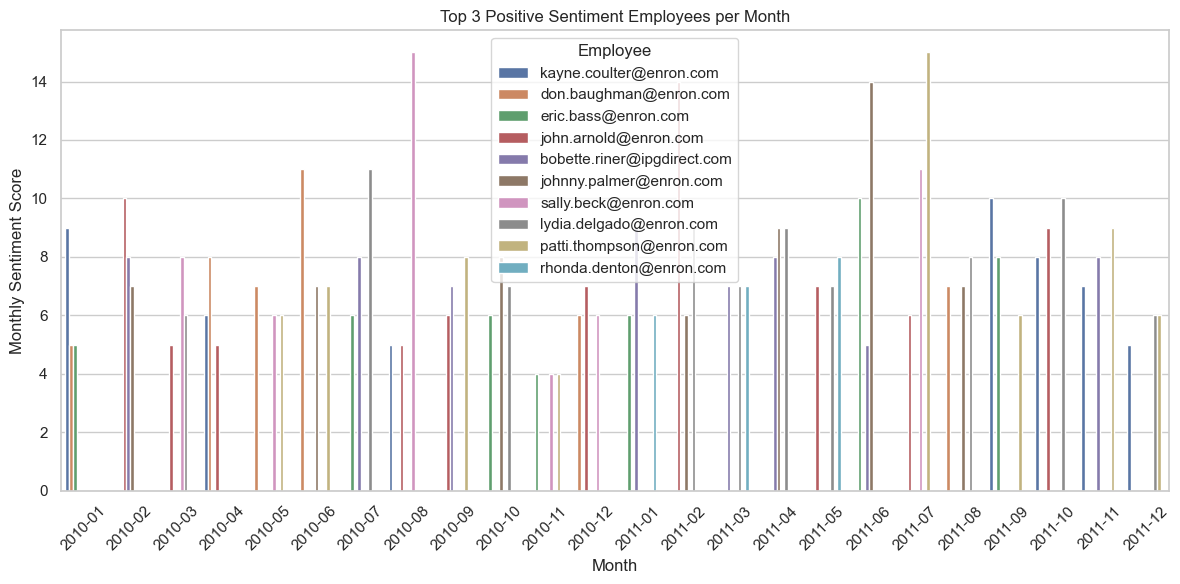

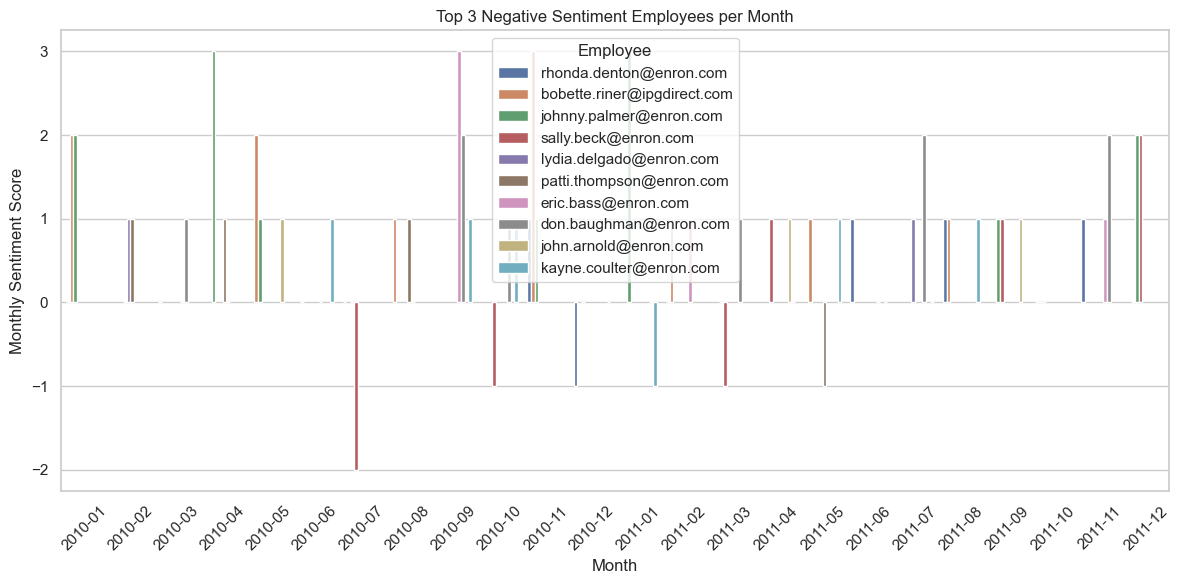

In [815]:
#task 4
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
# Reset the index so 'from' and 'Month' become regular columns 
monthly_scores = monthly_scores.reset_index()
# Get the top 3 employees with the highest sentiment scores for each month
top_positive = (monthly_scores.sort_values(by=['Month', 'MonthlyScore', 'from'], ascending=[True, False, True]).groupby('Month').head(3))
# Get the bottom 3 employees with the lowest (most negative) sentiment scores for each month
top_negative = (monthly_scores.sort_values(by=['Month', 'MonthlyScore', 'from'], ascending=[True, True, True]).groupby('Month').head(3))

print(top_positive)
print("break")
print(top_negative)
sns.set(style="whitegrid")

# Plots
plt.figure(figsize=(12, 6))
sns.barplot(data=top_positive, x='Month', y='MonthlyScore', hue='from')
plt.title('Top 3 Positive Sentiment Employees per Month')
plt.xticks(rotation=45)
plt.ylabel('Monthly Sentiment Score')
plt.xlabel('Month')
plt.legend(title='Employee')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=top_negative, x='Month', y='MonthlyScore', hue='from')
plt.title('Top 3 Negative Sentiment Employees per Month')
plt.xticks(rotation=45)
plt.ylabel('Monthly Sentiment Score')
plt.xlabel('Month')
plt.legend(title='Employee')
plt.tight_layout()
plt.show()


In [816]:
#task 5
# Filter the dataframe to only include rows where the 'Sentiment' column is 'Negative'
neg = df[df['Sentiment'] == 'Negative'].copy()
neg.sort_values(by=['from', 'date'], inplace=True)
flight_risk_employees = []
# Group the negative sentiment data by employee ('from' column)
for emp, group in neg.groupby('from'):
  
    dates_per_person = list(group['date'])
    for x in range(len(dates_per_person)):
        start = dates_per_person[x]
        count = 1
        # Count how many negative dates fall within 30 days of start
        for y in range(x + 1, len(dates_per_person)):
            if dates_per_person[y] - start <= timedelta(days=30):
                count += 1
                #print(emp)
            else:
                break
        if count >= 4:
            flight_risk_employees.append(emp)
            break 
flight_risk_employees


['bobette.riner@ipgdirect.com',
 'don.baughman@enron.com',
 'eric.bass@enron.com',
 'john.arnold@enron.com',
 'johnny.palmer@enron.com',
 'kayne.coulter@enron.com',
 'lydia.delgado@enron.com',
 'patti.thompson@enron.com',
 'rhonda.denton@enron.com',
 'sally.beck@enron.com']

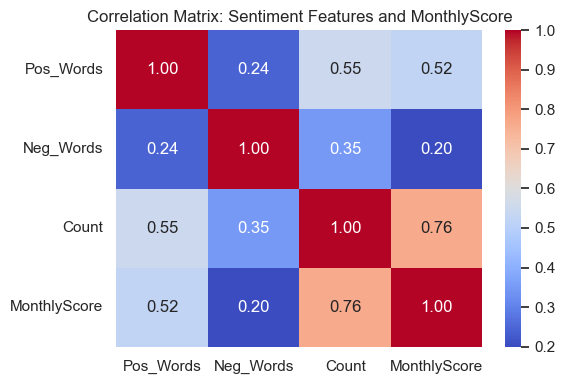

3.899316951437399
0.5713727931244386


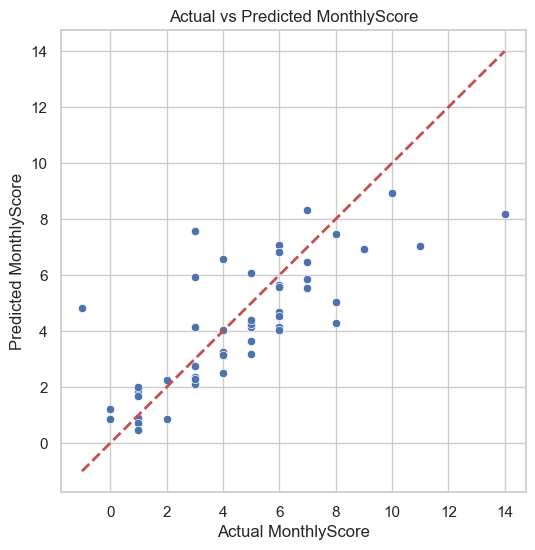

In [820]:


#lists of positive and negative associated words 
positive_words = {"good", "great", "excellent", "happy", "positive", "fantastic", "love", "enjoy","pleased", "pleasure","updated", "progress", "fair","Congratulations","Thanks","sure"}
negative_words = {"disappointed","sorry","bitch","leave","fuck", "never", "no", "fucking", "wrong", "tough", "disregard","Unfortunately", "sick","down","horrific", "sucks","hates", "BRUTAL", "withdraw", "discrepancies", "serious" }

# Function to count sentiment words according to positive and negative words
def count_sentiment_words(text):
    words = re.findall(r'\b\w+\b', str(text).lower())
    pos_count = sum(word in positive_words for word in words)
    neg_count = sum(word in negative_words for word in words)
    return pd.Series({"Pos_Words": pos_count, "Neg_Words": neg_count})

# Apply to each message
sentiment_counts = df["body"].apply(count_sentiment_words)

df = pd.concat([df, sentiment_counts], axis=1)

# Convert and extract month
df["date"] = pd.to_datetime(df["date"])
df["Month"] = df["date"].dt.to_period("M")

# Aggregate by sender and month
monthly_sentiment = df.groupby(["from", "Month"])[["Pos_Words", "Neg_Words"]].sum().reset_index()

# Merge with MonthlyScore
features_df = pd.merge(monthly_scores, monthly_sentiment, on=["from", "Month"])

#Add Count
messages = df.groupby(["from", "Month"]).agg(Count=("body", "count")).reset_index()
features_df = pd.merge(features_df, messages, on=["from", "Month"], how="left")
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns for correlation
correlation_data = features_df[["Pos_Words", "Neg_Words", "Count", "MonthlyScore"]]

# Compute correlation matrix
correlation_matrix = correlation_data.corr()

# plots correlation heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix: Sentiment Features and MonthlyScore")
plt.tight_layout()
plt.show()

# assigns X and y from features_df
X = features_df[["Pos_Words", "Neg_Words", "Count"]]
y = features_df["MonthlyScore"]

# Train-test split and modeling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(mean_squared_error(y_test, y_pred))
print(r2_score(y_test, y_pred))
# Visualization: Actual vs Predicted
plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_test, y=y_pred)
# plots a line to show what we indent the trend to be to show prediction accuracy
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual MonthlyScore")
plt.ylabel("Predicted MonthlyScore")
plt.title("Actual vs Predicted MonthlyScore")
plt.grid(True)
plt.show()
# This model uses the context of the body of the message by using the count of specified positive
#and negative word counts and the frequency of messages per month to predict sentiment scores and based 
#on the performance indicated by the Mean Squared Error and the R^2 scores. The R^2 is .57 which means a 
#57% variance in sentiment scores. The MSE score of 3.9 shows precision through the average squared difference 
#between actual and predicted scores. . This model is reasonaly effective at predicting sentiment scores as you
#can see by the graph but I do think there is room for improvement and there can be a better feauture enginneering 
#approach to get better scores.
